# Hierarchial Clustering

In [2]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
crimedata=pd.read_csv('crime_data.csv')
crimedata.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crimedata.shape

(50, 5)

In [9]:
#normalization process
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [10]:
#normalized dataframe
df_norm=norm_func(crimedata.iloc[:,1:])

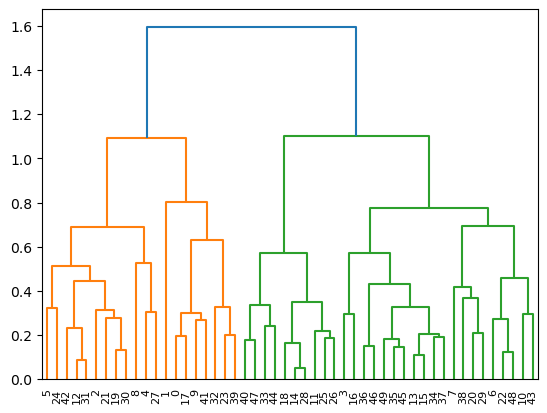

In [15]:
#creating dendrogram
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))

In [16]:
hc= AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')

In [17]:
hc

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=4)

In [18]:
#save clusters for chart
HC= hc.fit_predict(df_norm)
clusters=pd.DataFrame(HC,columns=['Clusters'])

C:\Users\MD SUFIYA\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [19]:
clusters

,Clusters
0,0
1,0
2,3
3,1
4,3
5,3
6,1
7,1
8,3
9,0


In [21]:
df_norm['h_clusterid'] = hc.labels_

In [22]:
hc.labels_

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

# Kmeans Clustering

In [23]:
crimedata=pd.read_csv('crime_data.csv')
crimedata.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [29]:
#normalization
stdscaler=StandardScaler()
norm_data=stdscaler.fit_transform(crimedata.iloc[:,1:])

In [30]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [1]:
data=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(norm_data)
    data.append(kmeans.inertia_)
    
plt.plot(range(1, 11), data)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Crime Data')
plt.show()

NameError: name 'KMeans' is not defined

In [ ]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=50)
clusters_new.fit(norm_data)

In [ ]:
clusters_new.labels_

In [ ]:
#Assign clusters to the data set
crimedata['clusterid_new'] = clusters_new.labels_

In [ ]:
#standardized values
clusters_new.cluster_centers_

# DBScan

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
crimedata=pd.read_csv('crime_data.csv',index_col=0)
crimedata

In [ ]:
array=crimedata.values

In [ ]:
array

In [ ]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [ ]:
X

In [ ]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(X)

In [ ]:
dbscan.labels_

In [ ]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [71]:
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [72]:
pd.concat([crimedata,cl],axis=1)

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236.0,58.0,21.2,NaN
Alaska,10.0,263.0,48.0,44.5,NaN
Arizona,8.1,294.0,80.0,31.0,NaN
Arkansas,8.8,190.0,50.0,19.5,NaN
California,9.0,276.0,91.0,40.6,NaN
...,...,...,...,...,...
45,NaN,NaN,NaN,NaN,0.0
46,NaN,NaN,NaN,NaN,-1.0
47,NaN,NaN,NaN,NaN,-1.0
48,NaN,NaN,NaN,NaN,-1.0
